In [1]:
from oipd import cli
from datetime import datetime
import matplotlib.pyplot as plt

# Example 1 NVIDIA

In [2]:
# --- example 1 - NVIDIA --- #

input_csv_path = "data/nvidia_date20250128_strikedate20250516_price12144.csv"
current_price = 121.44
current_date = "2025-01-28"
strike_date = "2025-05-16"
# Convert the strings to datetime objects
current_date_dt = datetime.strptime(current_date, "%Y-%m-%d")
strike_date_dt = datetime.strptime(strike_date, "%Y-%m-%d")
# Calculate the difference in days
days_difference = (strike_date_dt - current_date_dt).days
# output_csv_path = "/Users/henrytian/Downloads/results.csv"


In [3]:
days_difference

108

In [4]:
nvidia_pdf = cli.generate_pdf.run(
    input_csv_path=input_csv_path,
    current_price=float(current_price),
    days_forward=int(days_difference),
    risk_free_rate=0.03,
    fit_kernel_pdf=True,
)

In [5]:
nvidia_pdf.head()

,Price,PDF,CDF
0,55.000000,0.000808,0.002453
1,55.100041,0.000819,0.002535
2,55.200082,0.000829,0.002617
3,55.300122,0.000840,0.002700
4,55.400163,0.000850,0.002785


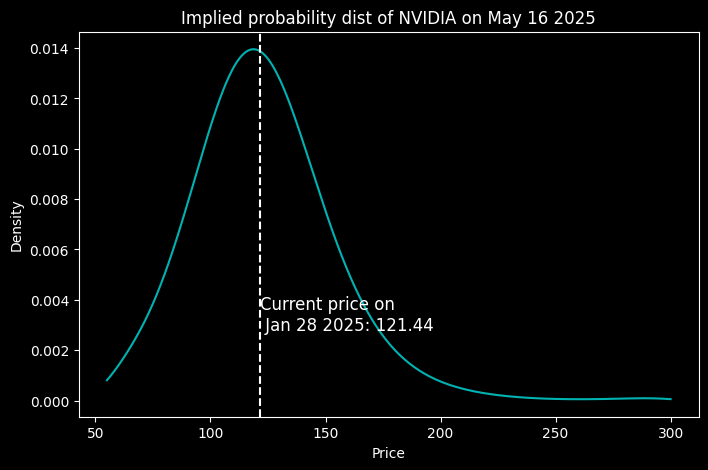

In [5]:
# Plot probability density function
plt.figure(figsize=(8, 5))
plt.plot(nvidia_pdf.Price, nvidia_pdf.PDF, label="Implied PDF", color="cyan", alpha=0.7)
# Add a vertical line at x = 121.44
plt.axvline(x=121.44, color="white", linestyle="--")
# Add annotation for clarity
plt.text(121.44, max(nvidia_pdf.PDF) * 0.3, "Current price on\n Jan 28 2025: 121.44", 
         color="white", fontsize=12, ha="left", va="top")
# Labels and title
plt.xlabel("Price")
plt.ylabel("Density")
# plt.legend()
plt.title("Implied probability dist of NVIDIA on May 16 2025")
# Show the plot
plt.show()

## Draw Figure Through Plotting Function

However the plotting function original accepts ndarray only, this change allows it to accept dataframe. 

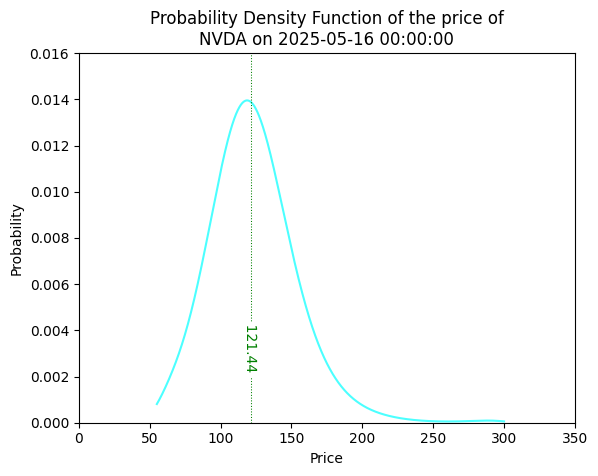

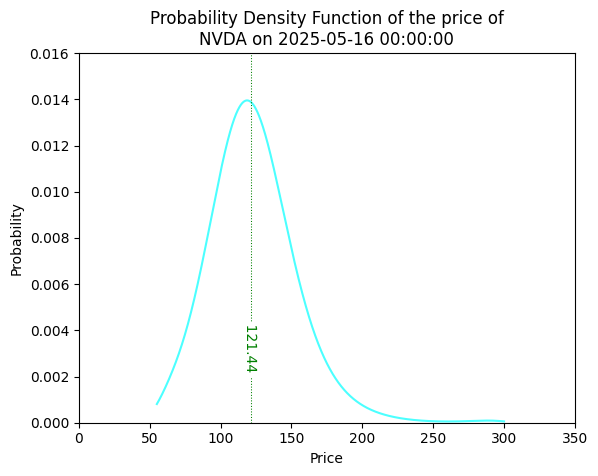

In [8]:
generate_pdf_figure(nvidia_pdf, 
                    security_ticker="NVDA",
                    expiry_date=strike_date_dt,
                    current_price=current_price,
                    ) 

In [10]:
# --- Example 2 - SPY --- #

input_csv_path = "data/spy_date20250128_strike20250228_price60444.csv"
current_price = 604.44
current_date = "2025-01-28"
strike_date = "2025-02-28"
# Convert the strings to datetime objects
current_date_dt = datetime.strptime(current_date, "%Y-%m-%d")
strike_date_dt = datetime.strptime(strike_date, "%Y-%m-%d")
# Calculate the difference in days
days_difference = (strike_date_dt - current_date_dt).days
# output_csv_path = "/Users/henrytian/Downloads/results.csv"

In [11]:
spy_pdf = cli.generate_pdf.run(
    input_csv_path=input_csv_path,
    current_price=float(current_price),
    days_forward=int(days_difference),
    risk_free_rate=0.03,
    fit_kernel_pdf=True,
)

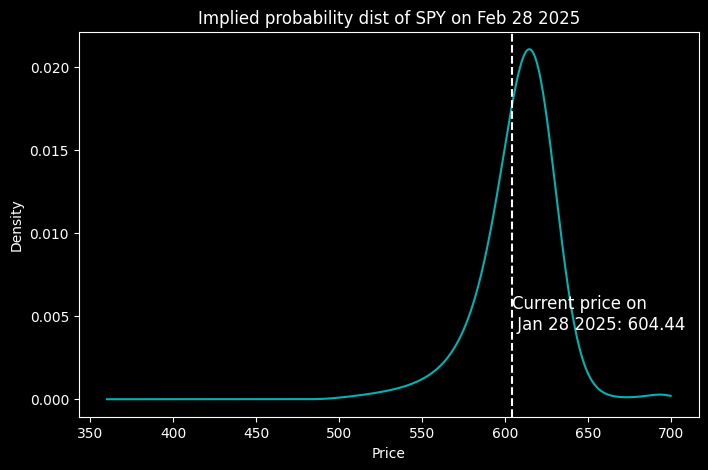

In [12]:
# Plot probability density function
plt.figure(figsize=(8, 5))
plt.plot(spy_pdf.Price, spy_pdf.PDF, label="Implied PDF", color="cyan", alpha=0.7)
# Add a vertical line at x = 121.44
plt.axvline(x=current_price, color="white", linestyle="--")
# Add annotation for clarity
plt.text(current_price, max(spy_pdf.PDF) * 0.3, "Current price on\n Jan 28 2025: "+str(current_price), 
         color="white", fontsize=12, ha="left", va="top")
# Labels and title
plt.xlabel("Price")
plt.ylabel("Density")
# plt.legend()
plt.title("Implied probability dist of SPY on Feb 28 2025")
# Show the plot
plt.show()

In [13]:
# --- Example 3 - US Steel --- #
input_csv_path = "data/ussteel_date20250128_strike20251219_price3629.csv"
current_price = 36.29
current_date = "2025-01-28"
strike_date = "2025-12-19"
# Convert the strings to datetime objects
current_date_dt = datetime.strptime(current_date, "%Y-%m-%d")
strike_date_dt = datetime.strptime(strike_date, "%Y-%m-%d")
# Calculate the difference in days
days_difference = (strike_date_dt - current_date_dt).days
# output_csv_path = "/Users/henrytian/Downloads/results.csv"



In [14]:
ussteel_pdf = cli.generate_pdf.run(
    input_csv_path=input_csv_path,
    current_price=float(current_price),
    days_forward=int(days_difference),
    risk_free_rate=0.03,
    fit_kernel_pdf=True,
    solver_method="newton"
)

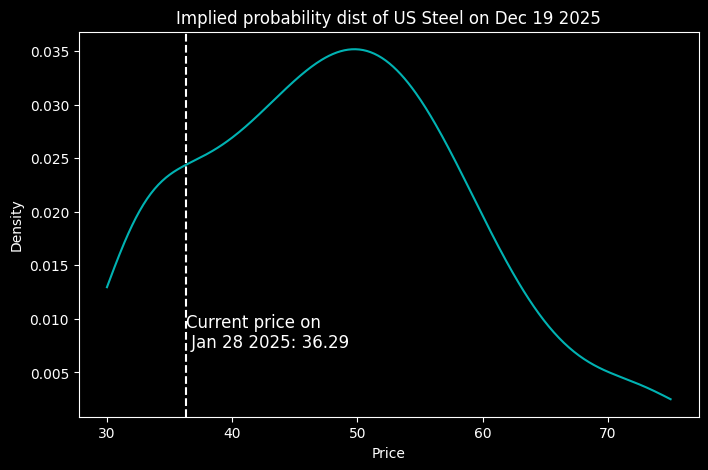

In [15]:
# Plot probability density function
plt.figure(figsize=(8, 5))
plt.plot(ussteel_pdf.Price, ussteel_pdf.PDF, label="Implied PDF", color="cyan", alpha=0.7)
# Add a vertical line at x = 121.44
plt.axvline(x=current_price, color="white", linestyle="--")
# Add annotation for clarity
plt.text(current_price, max(ussteel_pdf.PDF) * 0.3, "Current price on\n Jan 28 2025: "+str(current_price), 
         color="white", fontsize=12, ha="left", va="top")
# Labels and title
plt.xlabel("Price")
plt.ylabel("Density")
# plt.legend()
plt.title("Implied probability dist of US Steel on Dec 19 2025")
# Show the plot
plt.show()